## Import libraries

In [10]:
import pandas as pd
import numpy as np
from numpy import asarray
import scipy.io
from datetime import datetime, timedelta

import tensorflow as tf
from numpy import asarray


import keras

from keras.preprocessing import image
from keras.callbacks import ModelCheckpoint,EarlyStopping
from keras.layers import Dense, Activation, Dropout, Flatten, Input, Convolution2D, ZeroPadding2D, MaxPooling2D, Activation
from keras.layers import Conv2D, AveragePooling2D
from keras.models import Model, load_model, Sequential

from sklearn.model_selection import train_test_split

from keras import metrics

from keras.models import model_from_json
import matplotlib.pyplot as plt

import gc

In [12]:
gc.collect()

20

In [13]:
#restore the dataset
%store -r df

In [14]:
#check the top rows
df.head()

,full_path,gender,age
0,[17/10000217_1981-05-05_2009.jpg],1.0,28
2,[12/100012_1948-07-03_2008.jpg],1.0,60
4,[16/10002116_1971-05-31_2012.jpg],0.0,41
5,[02/10002702_1960-11-09_2012.jpg],0.0,52
6,[41/10003541_1937-09-27_1971.jpg],1.0,34


In [15]:
df = df[["full_path", "gender"]]
df.head()

,full_path,gender
0,[17/10000217_1981-05-05_2009.jpg],1.0
2,[12/100012_1948-07-03_2008.jpg],1.0
4,[16/10002116_1971-05-31_2012.jpg],0.0
5,[02/10002702_1960-11-09_2012.jpg],0.0
6,[41/10003541_1937-09-27_1971.jpg],1.0


In [16]:
df["gender"].value_counts()

1.0    15565
0.0     6573
Name: gender, dtype: int64

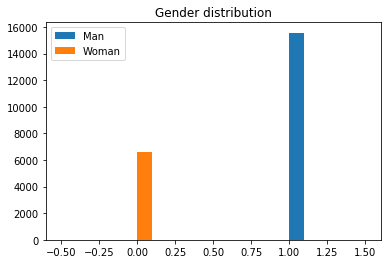

In [17]:
#check the distrbution
plt.hist(df["gender"][df["gender"]==1], label = 'Man')
plt.hist(df["gender"][df["gender"]==0], label = 'Woman')
plt.title("Gender distribution")
plt.legend();
# plt.hist(x1, **kwargs, color='g', label='Ideal')
# plt.hist(x2, **kwargs, color='b', label='Fair')

In [18]:
#build a function to get image pixels
target_size = (224, 224)
 
def get_pixels(image_path):
    img = image.load_img("/Users/kalz/Desktop/imdb-wiki/wiki_crop/%s" % image_path[0], grayscale=False, target_size=target_size)
    return asarray(img).reshape(1, -1)[0]

In [20]:
gc.collect()

20

In [21]:
#map function to image path to collect pixels
df['pixels'] = df['full_path'].apply(get_pixels)
df.head()

,full_path,gender,pixels
0,[17/10000217_1981-05-05_2009.jpg],1.0,"[255, 255, 255, 255, 255, 255, 255, 255, 255, ..."
2,[12/100012_1948-07-03_2008.jpg],1.0,"[92, 97, 91, 89, 94, 90, 91, 96, 92, 94, 98, 9..."
4,[16/10002116_1971-05-31_2012.jpg],0.0,"[61, 30, 10, 61, 30, 10, 61, 30, 10, 61, 30, 1..."
5,[02/10002702_1960-11-09_2012.jpg],0.0,"[97, 122, 178, 97, 122, 178, 97, 122, 178, 97,..."
6,[41/10003541_1937-09-27_1971.jpg],1.0,"[190, 189, 194, 204, 203, 208, 203, 202, 207, ..."


In [22]:
#using keras, onehot encode the age column with respective classes
classes = 2 
target = df['gender'].values
target_classes = keras.utils.to_categorical(target, classes)

In [23]:
#reshape the features
features = []
for i in range(0, df.shape[0]):
    features.append(df['pixels'].values[i])
 
features = np.array(features)
features = features.reshape(features.shape[0], 224, 224, 3)

In [24]:
features.shape

(22138, 224, 224, 3)

In [25]:
gc.collect()

40

In [26]:
#convert features datatype to float
features = features.astype('float32')

In [27]:
features.dtype

dtype('float32')

In [28]:
features /= 255

### Train Test Split

In [29]:
gc.collect()

80

In [30]:
X_train, X_test, y_train, y_test = train_test_split(features, target_classes, test_size=0.2)

In [23]:
#VGG-Face model
model = Sequential()
model.add(ZeroPadding2D((1,1),input_shape=(224,224, 3)))
model.add(Convolution2D(64, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))
 
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(128, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))
 
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(256, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(256, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))
 
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))
 
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))
 
model.add(Convolution2D(4096, (7, 7), activation='relu'))
model.add(Dropout(0.5))
model.add(Convolution2D(4096, (1, 1), activation='relu'))
model.add(Dropout(0.5))
model.add(Convolution2D(2622, (1, 1)))
model.add(Flatten())
model.add(Activation('softmax'))

In [24]:
# model.summary()

In [25]:
model.load_weights('/Users/kalz/Desktop/imdb-wiki/vgg_face_weights.h5')

In [26]:
gc.collect()

95

In [27]:
model.layers[-4].output

<tf.Tensor 'dropout_2/cond/Identity:0' shape=(None, 1, 1, 4096) dtype=float32>

In [28]:
#freeze all layers of VGG-Face except last 7 
for layer in model.layers[:-7]:
    layer.trainable = False

base_model_output = Sequential()
base_model_output = Convolution2D(classes, (1, 1), name='predictions')(model.layers[-4].output)
base_model_output = Flatten()(base_model_output)
base_model_output = Activation('sigmoid')(base_model_output)

gender_model = Model(inputs=model.input, outputs=base_model_output)

In [29]:
gender_model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
zero_padding2d_1_input (Inpu (None, 224, 224, 3)       0         
_________________________________________________________________
zero_padding2d_1 (ZeroPaddin (None, 226, 226, 3)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 224, 224, 64)      1792      
_________________________________________________________________
zero_padding2d_2 (ZeroPaddin (None, 226, 226, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 224, 224, 64)      36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 112, 112, 64)      0         
_________________________________________________________________
zero_padding2d_3 (ZeroPaddin (None, 114, 114, 64)      0   

In [30]:
gender_model.compile(loss='binary_crossentropy',
                      optimizer=keras.optimizers.Adam(),
                      metrics=['accuracy']
                     )

In [31]:
checkpointer = ModelCheckpoint(
                                filepath='my_gender_model',
                                monitor = "val_loss",
                                verbose=1,
                                save_best_only=True,
                                mode = 'auto'
                            )

In [32]:
scores = []

In [ ]:
epochs = 40
batch_size = 256
early_stop = EarlyStopping(monitor='val_loss', patience=5, verbose = 1) 

for i in range(epochs):
    print("epoch ",i)
        
    ix_train = np.random.choice(X_train.shape[0], size=batch_size)
        
    score = gender_model.fit(
                                X_train[ix_train], y_train[ix_train],
                                epochs=1,
                                validation_data=(X_test, y_test),
                                callbacks=[checkpointer, early_stop]
                            )
        
    scores.append(score)
        
gender_model.save_weights('gender_model_weights')

epoch  0
Train on 256 samples, validate on 4428 samples
Epoch 1/1
256/256 [==============================] - 913s 4s/step - loss: 0.1561 - accuracy: 0.9434 - val_loss: 0.4533 - val_accuracy: 0.8689

Epoch 00001: val_loss improved from inf to 0.45331, saving model to my_gender_model
epoch  1
Train on 256 samples, validate on 4428 samples
Epoch 1/1
256/256 [==============================] - 1036s 4s/step - loss: 0.2719 - accuracy: 0.9473 - val_loss: 0.1383 - val_accuracy: 0.9596

Epoch 00001: val_loss improved from 0.45331 to 0.13834, saving model to my_gender_model
epoch  2
Train on 256 samples, validate on 4428 samples
Epoch 1/1
256/256 [==============================] - 927s 4s/step - loss: 0.3117 - accuracy: 0.9121 - val_loss: 0.1033 - val_accuracy: 0.9671

Epoch 00001: val_loss improved from 0.13834 to 0.10333, saving model to my_gender_model
epoch  3
Train on 256 samples, validate on 4428 samples
Epoch 1/1
256/256 [==============================] - 946s 4s/step - loss: 0.1176 - acc

In [1]:
from keras.models import load_model
gender_model = load_model("my_gender_model")

Using TensorFlow backend.


In [ ]:
from keras.models import load_model
gender_model = load_model("my_gender_model")

In [2]:
gender_model.load_weights("/Users/kalz/Desktop/imdb-wiki/gender_model_weights.h5")

In [92]:
for i in scores:
    print(i.history)

{'val_loss': [0.08341869981644477], 'val_accuracy': [0.9856970906257629], 'loss': [0.09044432528932796], 'accuracy': [0.9750903]}
{'val_loss': [0.10456928402307937], 'val_accuracy': [0.9798253774642944], 'loss': [0.07153697804682814], 'accuracy': [0.9817372]}
{'val_loss': [0.10426917689069028], 'val_accuracy': [0.9804275631904602], 'loss': [0.07222043911439179], 'accuracy': [0.98160815]}
{'val_loss': [0.09389103833178716], 'val_accuracy': [0.9799759387969971], 'loss': [0.08004478199389552], 'accuracy': [0.98102736]}
{'val_loss': [0.07698386815959603], 'val_accuracy': [0.9816320538520813], 'loss': [0.07733795935952396], 'accuracy': [0.980382]}
{'val_loss': [0.13199717227659044], 'val_accuracy': [0.9781692028045654], 'loss': [0.06319561232981788], 'accuracy': [0.9832215]}
{'val_loss': [0.1034929812416181], 'val_accuracy': [0.9759108424186707], 'loss': [0.06728739640081378], 'accuracy': [0.98431855]}
{'val_loss': [0.11426024547105834], 'val_accuracy': [0.9772658944129944], 'loss': [0.0682

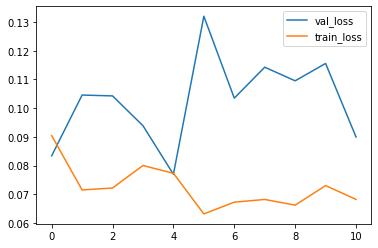

In [73]:
val_loss_change = []
loss_change = []
for i in range(0, len(scores)):
    val_loss_change.append(scores[i].history['val_loss'])
    loss_change.append(scores[i].history['loss'])

plt.plot(val_loss_change, label='val_loss')
plt.plot(loss_change, label='train_loss')
plt.legend(loc='upper right')
plt.show()

## Model Evaluation

In [32]:
#loss and accuracy on validation set
evaluate = gender_model.evaluate(X_test, y_test, verbose=1)

4428/4428 [==============================] - 480s 109ms/step


'Accuracy : 0.9864498376846313'

In [34]:
print(f"Validation loss : {evaluate[0]}")
print(f"Accuracy : {evaluate[1]}")

Validation loss : 0.09381377116828322
Accuracy : 0.9864498376846313


In [82]:
from sklearn.metrics import confusion_matrix

In [83]:
preds = gender_model.predict(X_test)

In [84]:
predicted = []
actual = []
for i in preds:
    predicted.append(np.argmax(i))
for ix in y_test:
    actual.append(np.argmax(ix))

confusion_matrix(actual, predicted)

array([[1283,   27],
       [  32, 3086]])

In [7]:
def loadImage(filepath):
    test_img = image.load_img(filepath, target_size=(224, 224))
    test_img = image.img_to_array(test_img)
    test_img = np.expand_dims(test_img, axis = 0)
    test_img /= 255
    return test_img

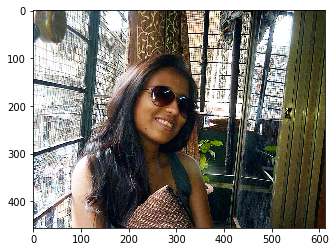

gender:  Male


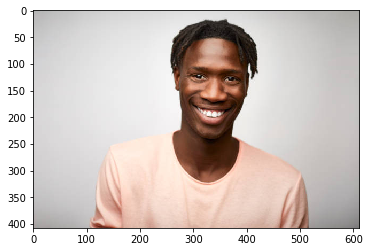

gender:  Male


In [85]:
pics = ["./ethnicity_clean/asian/(1).jpg","./ethnicity_clean/black/(100).jpg"]

for i in pics:
    prediction = gender_model.predict(loadImage(i))
    
    img = image.load_img(i)#, target_size=(224, 224))
    plt.imshow(img)
    plt.show()

    if np.argmax(prediction) == 1:
        gender = "Male"
    else:
        gender = "female"

    print("gender: ", gender)